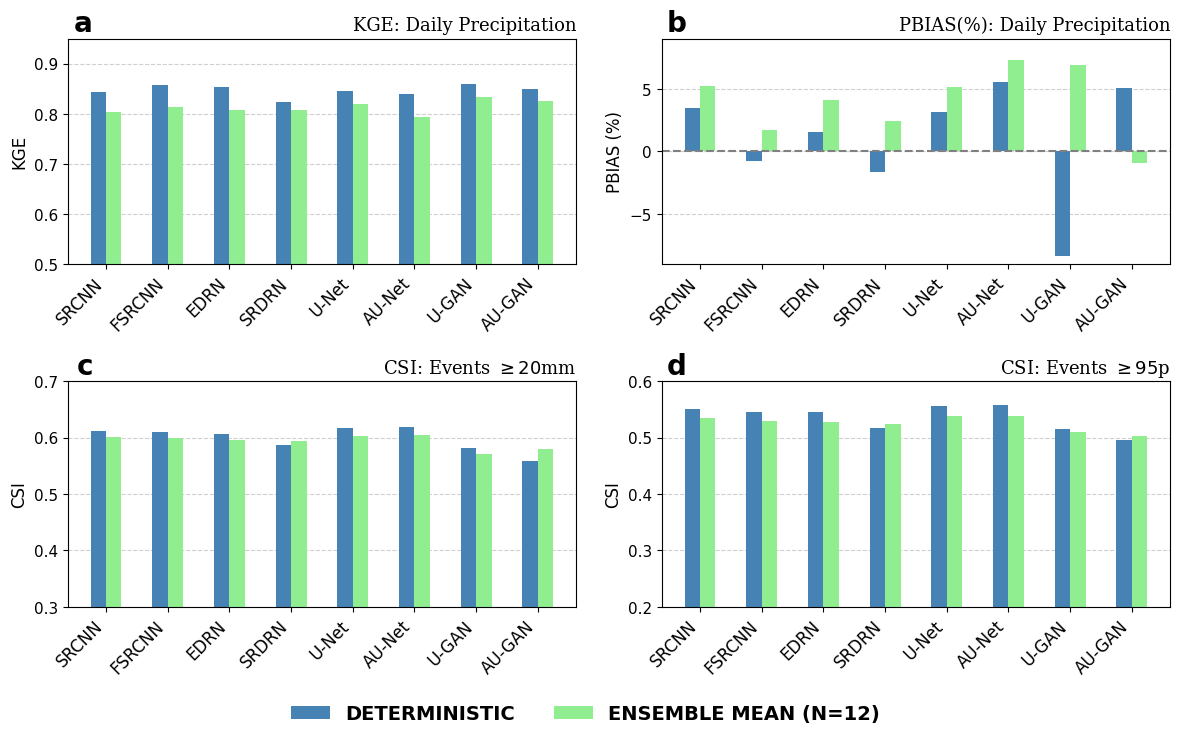

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

def filter_by_zone(df, zone_filter):
    """
    Filter the DataFrame based on the ZONE_NAME column.

    Parameters:
    df (pd.DataFrame): The DataFrame to filter.
    zone_filter (str): The value to filter the ZONE_NAME column by.

    Returns:
    pd.DataFrame: The filtered DataFrame.
    """
    return df[df["ZONE_NAME"] == zone_filter]

# Input

DATA_PATH = "/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/PLTDATA/FM09_Comparison_with_ensmn12"
zone_filter = "SEA MASK"
custom_labels = ['SRCNN', 'FSRCNN', 'EDRN', 'SRDRN', 'U-Net', 'AU-Net', 'U-GAN', 'AU-GAN']


# Load datasets
dprec_e01 = filter_by_zone(pd.read_csv(f"{DATA_PATH}/TABLE_EVALMETRICS_P02A.ALLDAY.e01.det00.csv"), zone_filter)
dprec_e02 = filter_by_zone(pd.read_csv(f"{DATA_PATH}/TABLE_EVALMETRICS_P02A.ALLDAY.e02.emn12.csv"), zone_filter)

a20mm_e01 = filter_by_zone(pd.read_csv(f"{DATA_PATH}/TABLE_EVALMETRICS_BINARY_METRICS_A20MM.C01.e01.csv"), zone_filter)
a20mm_e02 = filter_by_zone(pd.read_csv(f"{DATA_PATH}/TABLE_EVALMETRICS_BINARY_METRICS_A20MM.C01.e02.csv"), zone_filter)

a95pc_e01 = filter_by_zone(pd.read_csv(f"{DATA_PATH}/TABLE_EVALMETRICS_BINARY_METRICS_A95P.C01.e01.csv"), zone_filter)
a95pc_e02 = filter_by_zone(pd.read_csv(f"{DATA_PATH}/TABLE_EVALMETRICS_BINARY_METRICS_A95P.C01.e02.csv"), zone_filter)

# Extract model names
models = dprec_e01['EXP_ID'].values
x = np.arange(len(models))
width = 0.25

# Metrics to plot
metrics = [
    (dprec_e01, dprec_e02, 'KGE', 'KGE', 'KGE: Daily Precipitation', (0.5, 0.95)),
    (dprec_e01, dprec_e02, 'PBIAS', 'PBIAS (%)', 'PBIAS(%): Daily Precipitation', (-9, 9)),
    (a20mm_e01, a20mm_e02, 'CSI', 'CSI', f'CSI: Events $\\geq 20$mm', (0.3, 0.7)),
    (a95pc_e01, a95pc_e02, 'CSI', 'CSI', f'CSI: Events $\\geq 95 $p', (0.2, 0.6))
]

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=False)

# Labels (a), (b), (c), (d)
subplot_labels = ['a', 'b', 'c', 'd']

# Loop over the metrics to plot
for i, (df1, df2, metric, metric_name, plot_title, ylim) in enumerate(metrics):
    # Get values for each metric from both datasets
    values_e01 = df1[metric].values
    values_e02 = df2[metric].values

    # Identify row and column for the subplot in a 2x2 grid
    row = i // 2
    col = i % 2

    # Plot bars
    
    axes[row, col].bar(x - width/2, values_e01, width, label='DETERMINISTIC', color='steelblue', zorder=2)
    axes[row, col].bar(x + width/2, values_e02, width, label='ENSEMBLE MEAN (12 MEMBERS)', color='lightgreen', zorder=2)

    axes[row, col].set_ylabel(metric_name, fontsize=12)
    axes[row, col].set_xticks(x)
    axes[row, col].tick_params(axis='y', labelsize=11)
    axes[row, col].set_title(plot_title, fontsize=13, fontfamily='serif', ha='right', x=1.0)  # Title right-aligned

    axes[row, col].set_xticklabels(custom_labels, rotation=45, ha='right', fontsize=12)

    # Add subplot label
    axes[row, col].text(0.05, 1.13, subplot_labels[i], transform=axes[row, col].transAxes,
                        fontsize=20, fontweight='bold', va='top', ha='right')
    axes[row, col].set_ylim(ylim[0], ylim[1])
    axes[row, col].grid(axis='y', linestyle='--', alpha=0.6, zorder=0)
    
    # Adjust y-limits for specific metrics
    if metric == 'PBIAS':
        axes[row, col].axhline(y=0, color='gray', linestyle='--', label='_nolegend_')

# Adjust legend for the whole figure, placed below the subplots
font_prop = FontProperties(size=14, weight='semibold', family='sans-serif')
fig.legend(['DETERMINISTIC', 'ENSEMBLE MEAN (N=12)'], loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.07), prop=font_prop, frameon=False)

# Adjust layout and save
plt.tight_layout()
SAVE_DIR = '/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/RESULTS'
# plt.savefig(f'{SAVE_DIR}/Figure10_DeterministicVsEnsemble.jpg', format='jpg', dpi=500, bbox_inches='tight', facecolor='w')
plt.show()
